#Lab 1: Introduction to NumPy & Convolution
In this lab we will focus on creating 1D and 2D arrays in NumPy and performing basic operations such as elementwise multiplication and matrix multiplication. We will also perform convolution with 1D arrays and 2D matrices using NumPy (and SciPy for 2D).

Note that in this notebook we import Numpy as np, this means all the NumPy methods will be implemented as `np.method`.

As we can see in the image below, we can create arrays in numpy of 1,2,3 (or even greater) dimensions. It is important to note that the 1D array is more properly called a vector, it is not explicit that it represents a row or column.

![](https://fgnt.github.io/python_crashkurs_doc/_images/numpy_array_t.png)

#House Keeping
Import packages and define functions to read/process 2D image for later in the notebook.

In [1]:
import numpy as np
import urllib.request
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math
from scipy import signal
import requests
from PIL import Image
from io import BytesIO
import os
from urllib.parse import urlparse

In [3]:
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/f/fc/-2022-03-28_The_old_Corn_Mill%2C_Gimingham%2C_Norfolk_%281%29.JPG/640px--2022-03-28_The_old_Corn_Mill%2C_Gimingham%2C_Norfolk_%281%29.JPG"
#image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/f/f6/Great_Sphinx_of_Giza_-_20080716a.jpg/2560px-Great_Sphinx_of_Giza_-_20080716a.jpg"
# Function to read images from the Web.
def download_image(url, save_path):
    """
    Downloads an image from a URL and saves it to disk.
    If the image already exists at the specified path, it is read from disk.

    Args:
        url (str): URL of the image.
        save_path (str): Path to save the image on disk.

    Returns:
        None
    """
    # Parse the URL to get the filename
    filename = os.path.basename(urlparse(url).path)
    image_path = os.path.join(save_path, filename)

    # Check if the image already exists
    if os.path.exists(image_path):
        print(f"Image already exists at {image_path}. Reading from disk.")
        image = cv2.imread(image_path)
    else:
        print(f"Downloading image from {url}...")
        resp = urllib.request.urlopen(url)
        temp_image = np.asarray(bytearray(resp.read()), dtype="uint8")
        temp_image = cv2.imdecode(temp_image, cv2.IMREAD_COLOR)
        temp_image = cv2.cvtColor(temp_image, cv2.COLOR_BGR2RGB)
        print(f"Image downloaded and saved at {image_path}.")
        cv2.imwrite(image_path, temp_image)
        image = cv2.imread(image_path)
    return image

def norm_act_map(act_map):
   act_map = act_map**2
   offset = np.min(act_map)
   act_map=act_map-offset
   max_val = np.max(act_map)
   act_map = 255.0*(act_map)/max_val
   return act_map

def read_image():
   # read Image
   sf =1
   image = download_image(image_url,save_path="./")
   #Scale Image by sf = 2
   x,y,z = np.shape(image)
   image_scale = cv2.resize(image, dsize=(int(y/sf), int(x/sf)), interpolation=cv2.INTER_CUBIC)
   #Convert to Greyscale
   gray = cv2.cvtColor(image_scale, cv2.COLOR_BGR2GRAY)
   return gray

# Part 1: 1D Arrays
## 1.1: Building & addressing an array

Lets build a simple 1D array with 3 elements say 1,2 & 3. We will use the [np.array](https://numpy.org/doc/stable/reference/generated/numpy.array.html) method to do this. The np.array method converts an array like object to an array. So a python list can be converted to an array (see examples on linked page).

We can verify that the array has the correct shape (3,) by using [numpy.shape](https://numpy.org/doc/stable/reference/generated/numpy.shape.html)

In [49]:
# Create an array from a list

a = np.array((1,2,3))

# Get the shape of the array
shape_a = np.shape

# Print the elements and shape
print("The array a has elements = ",a," and shape = ",shape_a)

The array a has elements =  [1 2 3]  and shape =  <function shape at 0x7f822d312a70>


The array can be addressed similar to a python list. (Just remember in python that the index starts at 0)

In [6]:
# Print the 1st element of the array
print("The first element of the array = ", a[0] )
print("The second element of the array = ", a[1] )
print("The third element of the array = ", a[2] )

The first element of the array =  1
The second element of the array =  2
The third element of the array =  3


## 1.2: Elementwise multiplication
We will create a function `elewise_mult` that applies elementwise multiplication. We can simply use the * symbol or use [numpy.muliply](https://numpy.org/doc/stable/reference/generated/numpy.multiply.html) to perform the multiplication.

In [50]:
def elewise_mult(a,b):
  '''
   Input:
     a: an array
     b: a scalar or an array
  '''
  op = np.multiply(a,b)
  return op

Test your function with the code cells below

In [8]:
# Multiply the array a by a scalar value of 3 uisng *
b = elewise_mult(a,3)

# Print the elements of the result (verify is correct)
print("After scalar multiplication, the elements of the array b = ",b)

After scalar multiplication, the elements of the array b =  [3 6 9]


In [9]:
# Multiply the array a by it self (elmentwise multiplication)
c = elewise_mult(a,a)

# Print the elements of the result (verify is correct)
print("After elementwise multiplication, the elements of the array c = ",c)

After elementwise multiplication, the elements of the array c =  [1 4 9]


# 1.3: Inner and Outer product (Easy NumPy Method)

The simplest way to obtain the inner and outer product of two 1d arrays of the same shape we can use the built in NumPy functions [np.inner](https://numpy.org/doc/stable/reference/generated/numpy.inner.html) and [np.outer](https://numpy.org/doc/stable/reference/generated/numpy.outer.html).
Complete the function `arr_products` which can produce the inner or outer product of two arrays

In [10]:
def arr_products(a,b,mode):
  '''
  Input:
    a: an array
    b: an array
    mode: string can be 'inner' or 'outer'
  Output:
    op: an array corresponding to result of inner/outer prodcut
  '''
  #### Your code Here #######

  if mode == 'inner':
    op = np.inner(a,b)
  elif mode == 'outer':
    op = np.outer(a,b)
  return op

Test your function with the code cells below.

In [51]:
# Obtain the inner product of the 1D arrays a & b
c = arr_products(a,b,'inner')

# Print the elements of the result (verify is correct)
print("The result of the inner product of 1d arrays a & b = ",c)

The result of the inner product of 1d arrays a & b =  42


In [52]:
# Obtain the outer product of the 1D arrays a & b
d = arr_products(a,b,'outer')

# Print the elements of the result (verify is correct)
print("The result of the outer product of 1d arrays a & b = ",d)

The result of the outer product of 1d arrays a & b =  [[ 3  6  9]
 [ 6 12 18]
 [ 9 18 27]]


 # 1.4: Inner and Outer Product (More difficult matrix multiplication method)

 We can also complete these inner and outer product computations using matrix multiplication.

 As we can see in the image below, when we get the outer product of two 1D vectors $u$ & $v$ we must get the transpose of one of the vectors and perform the computation $uv^T$ . (In linear (matrix) algebra the typical convention is that vectors represent n-rows and 1 column, so the transpose will be 1 row and n-columns). The outer product of two 1D vectors (or numpy arrays) will give an (n x n) 2D array.  

![](https://media.cheggcdn.com/study/8a3/8a3993b3-d3e3-4885-a922-78c73a0f1d76/DC-1776V3.png)

 In the inner product case we perform matrix multiplication $u^Tv$ such that the result is a scalar value.  





In the code cell below you will complete the function `arr_products_mm` that will obtain the inner and outer products using matrix multiplication.

* Step 1: In order to perform matrix multiplication required to determine inner and outer product, it is first necessary to increase the dimensionality of the 1D arrays by using numpy [expand_dims](https://numpy.org/doc/stable/reference/generated/numpy.expand_dims.html) method. We want to make the 1D arrays explicitly 2D arrays i.e. a 3 x 1 column as shown in the image above, we can do this by setting axis=1 in the expand_dims method and an additional axis will be added. It will then be possible to get the transpose of these new arrays.

* Step 2: In order to get the **inner product** of the two arrays $u$ & $v$ we must multiply $u^T$ $v$ which multiples a 1 x 3 matrix by a 3 x 1 matrix which yields a scaler value (same as that obtained by np.inner previously.) We use [np.transpose](https://numpy.org/doc/stable/reference/generated/numpy.transpose.html#numpy-transpose) to get the transpose of a matrix/array. In order to perform matrix multiplication we need to use [np.matmul](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html#numpy-matmul), (As we have already seen, using * or [np.multiply](https://numpy.org/doc/stable/reference/generated/numpy.multiply.html#numpy-multiply) will give elementwise multiplication.)

* Step 3: In order to get the **outer product** of the arrays $u$ & $v$ we must matrix multiply $u$ $v^T$ which multiples a 3 x 1 matrix by a 1 x 3 matrix which yields a 3 x 3 matrix (same as that obtained by np.outer previously.)

In [31]:

def arr_products_mm(a,b,mode):
   '''
    Inputs:
      a: 1D array
      b: 1D array
      mode: string inner or outer
    Output:
       op: an array corresponding to result of inner/outer prodcut
   '''
   #### Your code here ####
   np.expand_dims(a, axis=1)
   np.expand_dims(b, axis=1)
   np.transpose(a)
   np.transpose(b)

   if mode == 'inner':
    op = np.inner(a,b)
   elif mode == 'outer':
    op = np.outer(a,b)

   return op

Test your function with the code cells below

In [32]:
# Get inner product of a & b
ip = arr_products_mm(a,b,'inner')
# Print the result
print("The inner product of a & b = ",ip)

The inner product of a & b =  42


In [53]:
# Get outer product of a & b
op = arr_products_mm(a,b,'outer')

# Print the result
print("The outer product of a & b = ",op)

The outer product of a & b =  [[ 3  6  9]
 [ 6 12 18]
 [ 9 18 27]]


#1.5: 1D Convolution
We will perform a 1D convolution between the input sequence $s$ and the kernel $k$ using the NumPy [convolve](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html) method. By default the convolution mode is set to "Full" this means that the input sequence is padded with zeros so that the kernel just overlaps.

In [54]:
# Define sequence and Kernel
s = [2,1,-1,-2,-3]
k = [1,2,0,-3]

# Perform Convolution
op_seq = np.convolve(s,k)

# Print the result
print('The result of convolution is =',op_seq)

The result of convolution is = [  2   5   1 -10 -10  -3   6   9]


# Part 2: 2D Array/kernel

## 2.1: Building and addressing 2D arrays
Using [numpy array](https://numpy.org/doc/stable/reference/generated/numpy.array.html), construct the edge kernel $ M = \begin{vmatrix} -1 & -1 & -1 \\ -1 & 8 & -1 \\ -1 & -1 & -1 \end{vmatrix}$


In [61]:
# Construct the kernel
M= np.array([[-1,-1,-1], [-1,8,-1], [-1,-1,-1]])

# Print the shape of the kernel
print("The shape of the kernel is = ",np.shape(M))

The shape of the kernel is =  (3, 3)


The elements of the 2D array can be addressed using the format M[r,c]. Where the r is position on axis 0 or the row of the 2D array and c is the position on axis 1 or the column of the 2D array.





In [56]:
# Address the element in the centre of the array and print it's value
print('The element in the center of the 2D array M =',M[1,1])

The element in the center of the 2D array M = 8


# 2.1 Matrix and Elementwise Multiplication
 We will create a function `mult_types` which will perform either both matrix multiplication and element wise multiplication and demonstrate the different results obtained. Examples of both approaches are shown in the figure below.


> In matrix multiplication we require the inner dimension of the two matrices to be the same. The order of the matrices (or 2D arrays is important).

>  In elementwise multiplication if the two arrays are the same size, then each element of the arrays multiplies the corresponding element of the 2nd arrays. If the arrays have at least one equal dimension and the other dimensions are 1 then the NumPy broadcasting rule applies. You can read more about [broadcasting in NumPy](https://numpy.org/doc/stable/user/basics.broadcasting.html) here. In this case here where we multiply the 1 x 3 array by the 3 x 3 array, the elements of the 1 x 3 array can be broadcast along the rows of the 3 x 3 array. It is important to note the differnce between elementwise multiplication and traditional matrix multiplication.


![](https://github.com/tonyscan6003/etivities/blob/66d31c0673a39dc18c9b6e26a8905de8faafdd30/matrix_elem_mult.jpg?raw=true)

In [62]:
def mult_types(a,b, mode):
  '''
    Input:
     a: A 2D numpy array or matrix
     b: A 2D numpy array or matrix
     mode: 'mult','elewise' Selects if are in matrix multiplication mode or elementwise multiplication
    Output:
     op: an array corresponding to result of matrix/elementwise multiplication
  '''
  ######### Your code Here ###############
  if mode == 'mult':
    op = np.dot(a, b)
  elif mode == 'elewise':
    op = np.multiply(a, b)
  return op

Test the operation of the `mult_types` function for matrix multiplication. We will multiply an input array $u$ of size 1 x 3 against the matrix $M$ of size 3 x 3. The expected output size should be 1 x 3.

In [63]:
# Perform matrix multiplication between the array u and M
u = [[1,2,3]]
print("The array 'u' has the shape ", np.shape(u))

mm_uxM =  mult_types(u,M, 'mult')

# Print the values and shape of the result
print("The result of matrix multiplication u x M = ",mm_uxM, " with shape =",np.shape(mm_uxM))

The array 'u' has the shape  (1, 3)
The result of matrix multiplication u x M =  [[-6 12 -6]]  with shape = (1, 3)


We will also try elementwise multiplication of the array $u$ which is of size 3 x 1 and the matrix M. Compare the result of this with the previous element wise multiplication and see how the elements of the array $u$ are now broadcast along the columns of the matrix $M$

In [45]:
# Perform elementwise multiplication between the array u and M
ewm_uxM = mult_types(u,M,'elewise')

# Print the values and shape of the result
print("The result of elementwise multiplication u x M = ",ewm_uxM, " with shape =",np.shape(ewm_uxM))

The result of elementwise multiplication u x M =  [[-1 -2 -3]
 [-1 16  3]
 [-1 -2 -3]]  with shape = (3, 3)


We also try elementwise multiplication of the transpose of $u$ that is $u^T$ against $M$. Here we see that $u^T$ is broadcast along the rows of the matrix $M$

In [46]:
# Perform elementwise multiplication between the array u Transpose and M
ewm_uTxM = mult_types(np.transpose(u),M,'elewise')

# Print the values and shape of the result
print("The result of elementwise multiplication u x M = ",ewm_uTxM, " with shape =",np.shape(ewm_uTxM))

The result of elementwise multiplication u x M =  [[-1 -1 -1]
 [-2 16  2]
 [-3 -3 -3]]  with shape = (3, 3)


#2.2: 2D Convolution with array M and Image
We will now convolve the array $m$ with a test image. We will use the SciPy [signal.convolve2D](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html) function to perform convolution.


In [64]:
# Read image (greyscale)
gray = read_image()

# Obtain the 2D convolution of image "gray" with kernel M
conv_img = signal.convolve2d(gray, M, mode='same', boundary='fill')






Image already exists at ./640px--2022-03-28_The_old_Corn_Mill%2C_Gimingham%2C_Norfolk_%281%29.JPG. Reading from disk.


Use the code cell below to normalise the output to the range 0->255 and plot the original image and the image after convolution.

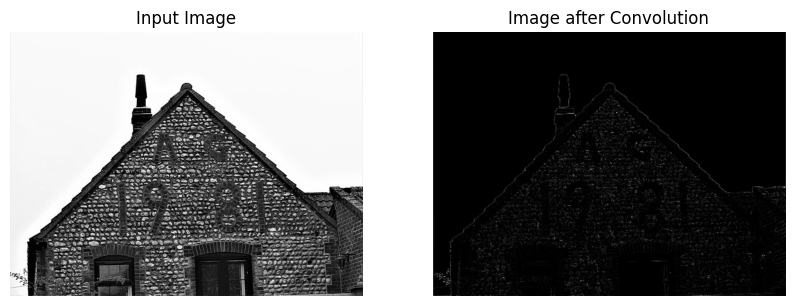

In [65]:
# Nomralise Image
norm_conv_img = norm_act_map(conv_img)
# Plot reference and test images
f, axarr = plt.subplots(1,2,figsize=(10,20))
axarr[0].imshow(gray,'gray')
axarr[0].axis('off')
axarr[0].title.set_text('Input Image')
axarr[1].imshow(norm_conv_img,'gray')
axarr[1].axis('off')
axarr[1].title.set_text('Image after Convolution')